# Выпускной проект по SQL

## Введение

**Цель**: Проанализировать базу данных крупного сервиса для чтения книг по подписке для формулирования ценностного предложения нового продукта

**Описание данных**

Таблица **books** cодержит данные о книгах:    
- *book_id* — идентификатор книги;    
- *author_id* — идентификатор автора;     
- *title* — название книги;    
- *num_pages* — количество страниц;    
- *publication_date* — дата публикации книги;     
- *publisher_id* — идентификатор издателя.     

Таблица **authors** cодержит данные об авторах:     
- *author_id* — идентификатор автора;    
- *author* — имя автора.    

Таблица **publishers** cодержит данные об издательствах:     
- *publisher_id* — идентификатор издательства;     
- *publisher* — название издательства;     
 
Таблица **ratings** cодержит данные о пользовательских оценках книг:     
- *rating_id* — идентификатор оценки;    
- *book_id* — идентификатор книги;     
- *username* — имя пользователя, оставившего оценку;     
- *rating* — оценка книги.     

Таблица **reviews** cодержит данные о пользовательских обзорах:    
- *review_id* — идентификатор обзора;    
- *book_id* — идентификатор книги;     
- *username* — имя автора обзора;     
- *text* — текст обзора.  

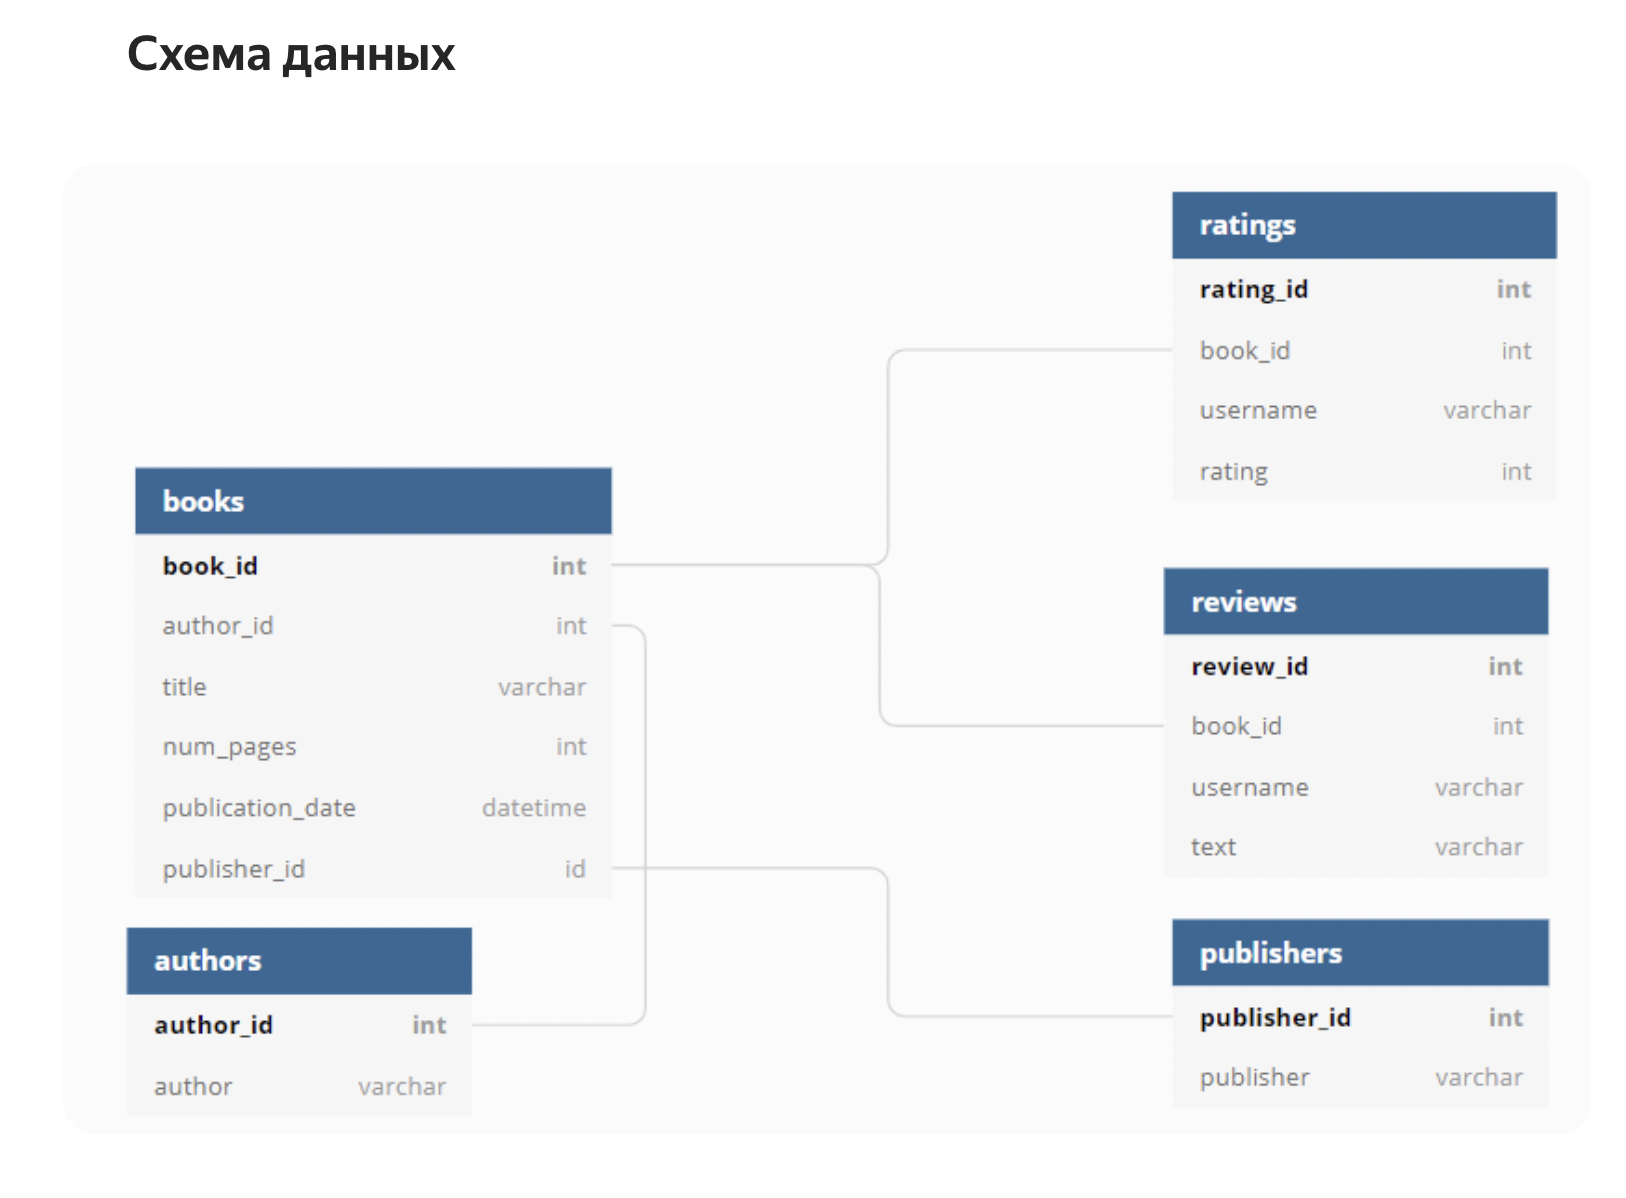

### Перечень необходимых действий

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку;
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц (исключение из анализа брошюр);
- Определить автора с самой высокой средней оценкой книг (книги с 50 и более оценками);
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

**Импорт библиотек**

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

### Изучение данных

**Таблица books:**

In [2]:
books = '''SELECT *
           FROM books'''
pd.io.sql.read_sql(books, con = engine) 

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


**Таблица authors:**

In [3]:
authors = '''SELECT *
           FROM authors'''
pd.io.sql.read_sql(authors, con = engine) 

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


**Таблица ratings:**

In [4]:
ratings = '''SELECT *
           FROM ratings'''
pd.io.sql.read_sql(ratings, con = engine) 

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


**Таблица reviews:**

In [5]:
reviews = '''SELECT *
           FROM reviews'''
pd.io.sql.read_sql(reviews, con = engine) 

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same ...
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy po...
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone f...


**Таблица publishers:**

In [6]:
publishers = '''SELECT *
           FROM publishers'''
pd.io.sql.read_sql(publishers, con = engine) 

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


## Ответ на вопросы заказчика

### **Сколько книг вышло после 1 января 2000 года?**

In [7]:
task_1  = '''SELECT COUNT(book_id)
             FROM books
             WHERE publication_date > '2000-01-01';
          '''
pd.io.sql.read_sql(task_1, con = engine) 

,count
0,819


После 1 января 2000 года было выпущено **819** книг

### **Количество обзоров и средняя оценка каждой книги**

In [8]:
task_2  = '''SELECT b.book_id,
                    title,
                    COUNT(distinct(rev.review_id)),
                    AVG(r.rating)

             FROM books AS b
             LEFT JOIN ratings AS r ON b.book_id=r.book_id
             LEFT JOIN reviews AS rev ON b.book_id=rev.book_id
             GROUP BY b.book_id, title
             ORDER BY COUNT(distinct(rev.review_id)) DESC;
          '''
pd.io.sql.read_sql(task_2, con = engine) 

,book_id,title,count,avg
0,948,Twilight (Twilight #1),7,3.662500
1,963,Water for Elephants,6,3.977273
2,734,The Glass Castle,6,4.206897
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,808,The Natural Way to Draw,0,3.000000
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
998,221,Essential Tales and Poems,0,4.000000


Максимальное количество обзоров для книг - 7, минимальное - 0

Максимальная средняя оценка книг - 5, минимальная - 1.5

### **Издательство, которое выпустило наибольшее число книг толще 50 страниц (исключение из анализа брошюр)**

In [9]:
task_3  = '''SELECT distinct p.publisher,
                    COUNT(distinct b.title)
                    
             FROM publishers AS p
             LEFT JOIN books AS b ON p.publisher_id=b.publisher_id
             WHERE b.num_pages>=50
             GROUP BY p.publisher
             ORDER BY COUNT(distinct b.title) DESC
             LIMIT 1;
          '''
pd.io.sql.read_sql(task_3, con = engine) 

,publisher,count
0,Penguin Books,42


Издательство, которое выпустило наибольшее число книг толще 50 страниц: **Penguin Books**

### **Автор с самой высокой средней оценкой книг (книги с 50 и более оценками)**

In [10]:
task_4  = '''WITH q1 AS (SELECT b.title,
                                b.book_id,
                                COUNT(rating_id)
                         FROM books as b
                         JOIN ratings as r ON b.book_id = r.book_id
                         GROUP BY title, b.book_id
                         HAVING COUNT(rating_id) > 50)
             SELECT author, 
                    round(AVG(r.rating),3) as avg_rating
             FROM authors AS a
             JOIN books AS b ON b.author_id = a.author_id
             JOIN q1 ON b.title = q1.title
             JOIN ratings AS r ON q1.book_id = r.book_id
 
             GROUP BY a.author_id, a.author
             ORDER BY AVG(r.rating) DESC
             LIMIT 1;

         '''
pd.io.sql.read_sql(task_4, con = engine) 

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287


Автор с самой высокой средней оценкой книг (среди книг с более чем 50 оценками) - **J.K. Rowling/Mary GrandPré**

### **Среднее количество обзоров от пользователей, которые поставили больше 50 оценок.**

In [11]:
task_5 = ''' SELECT COUNT(DISTINCT rev.review_id)/ COUNT(DISTINCT rev.username) AS avg_reviews_count
             FROM reviews AS rev
             JOIN ratings AS r ON r.username = rev.username
             WHERE rev.username in (SELECT r.username
                                    FROM ratings AS r
                                    GROUP BY username
                                    HAVING COUNT(rating_id) > 50);
        '''

pd.io.sql.read_sql(task_5, con = engine)

,avg_reviews_count
0,24


Среднее количество обзоров от пользователей, которые поставили больше 50 оценок = **24**

## Вывод

Для формулирования ценностного предложения нового продукта крупного сервиса для чтения книг были изучены наборы данных, содержащие следующую информацию: 

Таблица **books**:    
- *book_id* — идентификатор книги;    
- *author_id* — идентификатор автора;     
- *title* — название книги;    
- *num_pages* — количество страниц;    
- *publication_date* — дата публикации книги;     
- *publisher_id* — идентификатор издателя.     

Таблица **authors**:     
- *author_id* — идентификатор автора;    
- *author* — имя автора.    

Таблица **publishers**:     
- *publisher_id* — идентификатор издательства;     
- *publisher* — название издательства;     
 
Таблица **ratings**:     
- *rating_id* — идентификатор оценки;    
- *book_id* — идентификатор книги;     
- *username* — имя пользователя, оставившего оценку;     
- *rating* — оценка книги.     

Таблица **reviews**:    
- *review_id* — идентификатор обзора;    
- *book_id* — идентификатор книги;     
- *username* — имя автора обзора;     
- *text* — текст обзора.  

В результате анализа были получены ответы на вопросы:
 - Сколько книг вышло после 1 января 2000 года;
 - Сколько обзоров и какова средняя оценка каждой книги?
 - Как называется издательство, которое выпустило наибольшее число книг толще 50 страниц?
 - У какого автора самая высокая средняя оценка книг(для книг с 50 и более оценками)?
 - Какое среднее количество обзоров от пользователей, которые поставили больше 50 оценок?
 
Так: 
 - После 1 января 2000 года было выпущено 819 книг
 - Максимальное количество обзоров для книг - 7, минимальное - 0. Максимальная средняя оценка книг - 5, минимальная - 1.5
 - Название издательства, которое выпустило наибольшее число книг толще 50 страниц - Penguin Books
 - Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - 24
